# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [21]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [22]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [23]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [24]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [25]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [3]:
client = MongoClient(mongod_connect)
db = client.gp14 # use or create a database named demo
tweet_collection = db.lab10 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [6]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1327052297680117761
1327052299466891265
1327052299533910016
1327052299550806016
1327052300196646914
1327052300381278208
1327052301555609601
1327052301454938112
1327052301928783873
1327052301870067712
1327052301941485568
1327052302721507328
1327052302729920512
1327052303376003082
1327052303837265920
1327052304852324352
1327052305456373761
1327052307121508352
1327052307373158400
1327052307478016000
1327052307620646913
1327052307566120960
1327052307893194753
1327052307528343554
1327052308752994305
1327052308954419205
1327052309600346113
1327052309734567941
1327052310074195969
1327052311072542720
1327052311231827969
1327052313777868800
1327052315325591552
1327052311303254017
1327052315266850817
1327052317292683264
1327052317741490176
1327052318395817985
1327052319180029957
1327052321281503232
1327052324313976832
1327052324531998722
1327052324632715265
1327052324796293120
1327052326188802050
1327052326104928257
1327052326813667328
1327052327568740358
1327052327828680704
1327052329523306497


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [8]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [9]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [10]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Fri Nov 13 00:55:37 +0000 2020'
'Fri Nov 13 00:55:37 +0000 2020'
'Fri Nov 13 00:55:36 +0000 2020'
'Fri Nov 13 00:55:36 +0000 2020'
'Fri Nov 13 00:55:36 +0000 2020'
'Fri Nov 13 00:55:36 +0000 2020'
'Fri Nov 13 00:55:36 +0000 2020'
'Fri Nov 13 00:55:34 +0000 2020'
'Fri Nov 13 00:55:34 +0000 2020'
'Fri Nov 13 00:55:34 +0000 2020'
'Fri Nov 13 00:55:33 +0000 2020'
'Fri Nov 13 00:55:33 +0000 2020'
'Fri Nov 13 00:55:33 +0000 2020'
'Fri Nov 13 00:55:32 +0000 2020'
'Fri Nov 13 00:55:32 +0000 2020'
'Fri Nov 13 00:55:32 +0000 2020'
'Fri Nov 13 00:55:32 +0000 2020'
'Fri Nov 13 00:55:32 +0000 2020'
'Fri Nov 13 00:55:31 +0000 2020'
'Fri Nov 13 00:55:31 +0000 2020'
'Fri Nov 13 00:55:31 +0000 2020'
'Fri Nov 13 00:55:30 +0000 2020'
'Fri Nov 13 00:55:30 +0000 2020'
'Fri Nov 13 00:55:29 +0000 2020'
'Fri Nov 13 00:55:29 +0000 2020'
'Fri Nov 13 00:55:29 +0000 2020'
'Fri Nov 13 00:55:28 +0000 2020'
'Fri Nov 13 00:55:28 +0000 2020'
'Fri Nov 13 00:55:28 +0000 2020'
'Fri Nov 13 00:55:27 +0000 2020'
'Fri Nov 1

In [12]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Fri Nov 13 00:43:31 +0000 2020'
'Fri Nov 13 00:43:31 +0000 2020'
'Fri Nov 13 00:43:31 +0000 2020'
'Fri Nov 13 00:43:31 +0000 2020'
'Fri Nov 13 00:43:31 +0000 2020'
'Fri Nov 13 00:43:30 +0000 2020'
'Fri Nov 13 00:43:30 +0000 2020'
'Fri Nov 13 00:43:30 +0000 2020'
'Fri Nov 13 00:43:30 +0000 2020'
'Fri Nov 13 00:43:29 +0000 2020'
'Fri Nov 13 00:43:29 +0000 2020'
'Fri Nov 13 00:43:29 +0000 2020'
'Fri Nov 13 00:43:28 +0000 2020'
'Fri Nov 13 00:43:28 +0000 2020'
'Fri Nov 13 00:43:27 +0000 2020'
'Fri Nov 13 00:43:27 +0000 2020'
'Fri Nov 13 00:43:26 +0000 2020'
'Fri Nov 13 00:43:26 +0000 2020'
'Fri Nov 13 00:43:26 +0000 2020'
'Fri Nov 13 00:43:25 +0000 2020'
'Fri Nov 13 00:43:25 +0000 2020'
'Fri Nov 13 00:43:25 +0000 2020'
'Fri Nov 13 00:43:24 +0000 2020'
'Fri Nov 13 00:43:24 +0000 2020'
'Fri Nov 13 00:43:24 +0000 2020'
'Fri Nov 13 00:43:23 +0000 2020'
'Fri Nov 13 00:43:23 +0000 2020'
'Fri Nov 13 00:43:23 +0000 2020'
'Fri Nov 13 00:43:23 +0000 2020'
'Fri Nov 13 00:43:23 +0000 2020'
'Fri Nov 1

KeyboardInterrupt: 

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [13]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

15262
12998


Create a text index and print the Tweets containing specific keywords. 

In [14]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [15]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [16]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: James One
text: This is why the criminal Donald J Trump lost the USA Election. It's why President Elect BIDEN needs to be given con… https://t.co/xlgQOcKXGE
----
name: Ellen
text: to thank them for their DOMINION election fraud help
----
name: iain.s
text: Who do you think you are @BorisJohnson your elected to serve not rule and dictate
----
name: Mary Rarick
text: @SarahBeckman3 I'd recommend electing different leaders. #Iowa #Covid19
----
name: President Elect Lisa Baker!
text: You know it! I expect Biden will be facing criminal charges after this election fraud is dealt with!
----
name: Avannia.C
text: RT @iingwen: Congratulations to @Vystrcil_Milos on once again being elected #Czechia senate president. You are a true friend to all of us i…
----
name: Nagaraj tmn @ gmail.
text: RT @mkstalin: Conduct of elections during #Covid19 is testament to the resoluteness of our democracy. 

Nevertheless, allegations of malpra…
----
name: the bot formerly known as layoff
text: In the

In [17]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [18]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,lang,timestamp_ms,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,metadata,retweeted_status,display_text_range,extended_entities
0,5fadd5d0221e6019e42b4263,Fri Nov 13 00:39:38 +0000 2020,1327048443311792128,1327048443311792128,This is why the criminal Donald J Trump lost t...,"<a href=""http://twitter.com/download/android"" ...",True,NaN,None,NaN,...,en,1605227978910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fadc181f2d879459bfa4b3c,Thu Nov 12 23:13:00 +0000 2020,1327026640787009536,1327026640787009536,to thank them for their DOMINION election frau...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,en,1605222780783,1.327020e+18,1327019717052297224,{'created_at': 'Thu Nov 12 22:45:30 +0000 2020...,"{'url': 'https://t.co/NIKrSx03nR', 'expanded':...",NaN,NaN,NaN,NaN
2,5fadbd69f2d879459bfa2f8d,Thu Nov 12 22:55:32 +0000 2020,1327022243902316545,1327022243902316545,Who do you think you are @BorisJohnson your el...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,en,1605221732484,1.327000e+18,1326999936706207748,{'created_at': 'Thu Nov 12 21:26:54 +0000 2020...,"{'url': 'https://t.co/steNWvN93R', 'expanded':...",NaN,NaN,NaN,NaN
3,5fadd98aad0440df95de1730,Fri Nov 13 00:55:33 +0000 2020,1327052447429193730,1327052447429193730,@SarahBeckman3 I'd recommend electing differen...,"<a href=""https://about.twitter.com/products/tw...",False,1.327044e+18,1327043895230943236,377424155.0,...,en,NaN,NaN,NaN,NaN,NaN,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN
4,5fadbe66f2d879459bfa365c,Thu Nov 12 22:59:45 +0000 2020,1327023303404318720,1327023303404318720,You know it! I expect Biden will be facing cri...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,en,1605221985089,1.327020e+18,1327019717052297224,{'created_at': 'Thu Nov 12 22:45:30 +0000 2020...,"{'url': 'https://t.co/sGjn6wgdCM', 'expanded':...",NaN,NaN,NaN,NaN
5,5fadd9aead0440df95de211d,Fri Nov 13 00:44:37 +0000 2020,1327049693646495745,1327049693646495745,RT @iingwen: Congratulations to @Vystrcil_Milo...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,en,NaN,1.326471e+18,1326471475638001665,NaN,NaN,"{'iso_language_code': 'en', 'result_type': 're...",{'created_at': 'Wed Nov 11 13:52:50 +0000 2020...,NaN,NaN
6,5fadd99dad0440df95de1b36,Fri Nov 13 00:51:08 +0000 2020,1327051336290947074,1327051336290947074,RT @mkstalin: Conduct of elections during #Cov...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,en,NaN,NaN,NaN,NaN,NaN,"{'iso_language_code': 'en', 'result_type': 're...",{'created_at': 'Wed Nov 11 05:21:52 +0000 2020...,NaN,NaN
7,5fadd3dc221e6019e42b3746,Fri Nov 13 00:31:19 +0000 2020,1327046349817225216,1327046349817225216,"In the last half hour, 873 people tweeted abou...","<a href=""https://laramiewatherbot.co"" rel=""nof...",False,NaN,None,NaN,...,en,1605227479782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5fadc06af2d879459bfa4411,Thu Nov 12 23:08:21 +0000 2020,1327025470035128324,1327025470035128324,RT @WaytowichNeil: This is the direct result o...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,en,1605222501654,1.326702e+18,1326702214581248004,{'created_at': 'Thu Nov 12 01:43:51 +0000 2020...,"{'url': 'https://t.co/Mo1Gl7NRVo', 'expanded':...",NaN,{'created_at': 'Thu Nov 12 19:25:47 +0000 2020...,NaN,NaN
9,5fadbec4f2d879459bfa3944,Thu Nov 12 23:01:19 +0000 2020,1327023700055474177,1327023700055474177,"In the last half hour, 829 people tweeted abou...","<a href=""https://laramiewatherbot.co"" rel=""nof...",False,NaN,None,NaN,...,en,1605222079658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


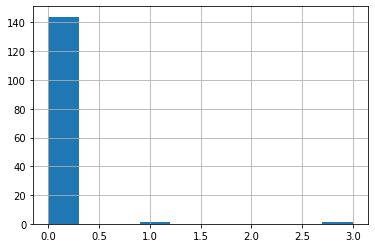

In [19]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count